###### Credit : www.superdatascience.com

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Insurance Data.csv')

In [3]:
df.head()

,id,gender,bmi,age_bracket,previous_claim,claim
0,1,female,obese,31-50,0,no_claim
1,2,female,under_weight,50+,0,claim
2,3,female,over_weight,18-30,0,no_claim
3,4,female,under_weight,31-50,0,no_claim
4,5,female,under_weight,50+,1,no_claim


## EDA

##### Countplot of Claim History of Customers

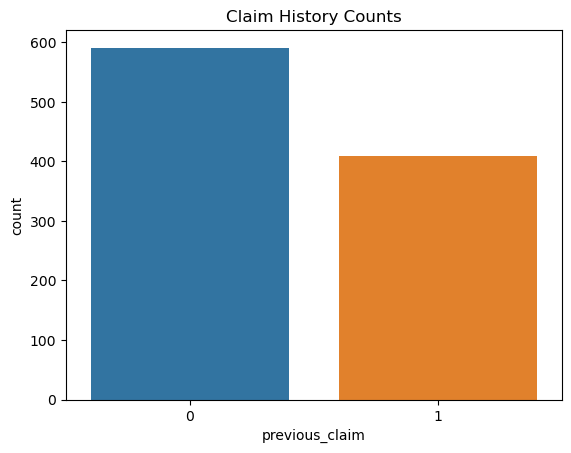

In [8]:
sns.countplot(df, x = 'previous_claim')

plt.title('Claim History Counts')
plt.show()

##### Target Variable Counts

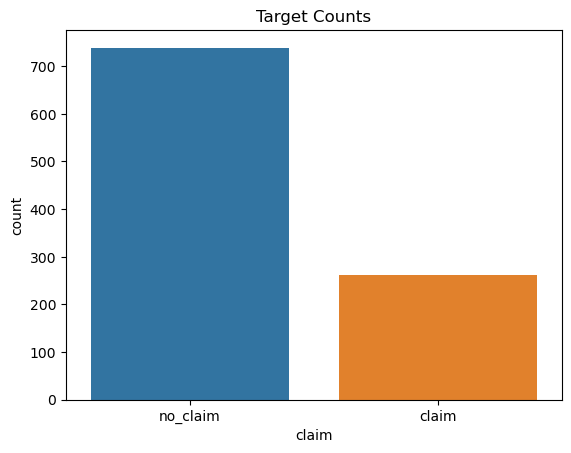

In [9]:
sns.countplot(df, x = 'claim')

plt.title('Target Counts')
plt.show()

## Preprocessing

##### Drop unnecessary information

In [10]:
df.drop('id', axis = 1, inplace = True)

##### Check Missing Data

In [11]:
df.isnull().sum()

gender            0
bmi               0
age_bracket       0
previous_claim    0
claim             0
dtype: int64

##### Encode Categorical Values

In [12]:
df['gender'].value_counts()

gender
female    503
male      497
Name: count, dtype: int64

In [13]:
df['bmi'].value_counts()

bmi
under_weight     301
normal_weight    273
over_weight      259
obese            167
Name: count, dtype: int64

In [14]:
df['age_bracket'].value_counts()

age_bracket
31-50    357
50+      337
18-30    306
Name: count, dtype: int64

In [15]:
df['previous_claim'].value_counts()

previous_claim
0    591
1    409
Name: count, dtype: int64

In [16]:
df['claim'].value_counts()

claim
no_claim    739
claim       261
Name: count, dtype: int64

In [17]:
gender = pd.get_dummies(df['gender'], dtype = float, drop_first = True)
bmi = pd.get_dummies(df['bmi'], dtype = float, drop_first = True)
age = pd.get_dummies(df['age_bracket'], dtype = float, drop_first = True)
p_claim = pd.get_dummies(df['previous_claim'], dtype = float, drop_first = True)
claim = pd.get_dummies(df['claim'], dtype = float)

In [18]:
df = pd.concat([gender, bmi, age, p_claim, claim], axis = 1)

In [19]:
df.head()

,male,obese,over_weight,under_weight,31-50,50+,1,claim,no_claim
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [20]:
df.drop('no_claim', axis = 1, inplace = True)

In [21]:
df.columns = ['male', 'obese', 'over_weight', 'under_weight', '31-50', '50+', 'previous_claim', 'claim']

In [22]:
df['claim'].value_counts()

claim
0.0    739
1.0    261
Name: count, dtype: int64

## 1/ Random Forest

##### Set Split

In [23]:
X = df.drop('claim', axis = 1).values
y = df['claim'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(n_estimators = 150, random_state = 42)

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

##### Prediction

In [29]:
y_pred = rf.predict(X_test)

##### Evaluation

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       146
         1.0       0.53      0.17      0.25        54

    accuracy                           0.73       200
   macro avg       0.64      0.56      0.55       200
weighted avg       0.69      0.73      0.68       200

[[138   8]
 [ 45   9]]


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   male            1000 non-null   float64
 1   obese           1000 non-null   float64
 2   over_weight     1000 non-null   float64
 3   under_weight    1000 non-null   float64
 4   31-50           1000 non-null   float64
 5   50+             1000 non-null   float64
 6   previous_claim  1000 non-null   float64
 7   claim           1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


##### Single Prediction : male, not obese, not over weight, under weight, age bracket 31-50, no claim history

In [33]:
rf.predict([[0, 0, 0, 1, 1, 0, 0]])

array([0.])

## 2/ SVM with Grid Search

##### Model

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

##### Prediction

In [35]:
y_pred = svm.predict(X_test)

##### Evaluation

In [36]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85       146
         1.0       0.60      0.17      0.26        54

    accuracy                           0.74       200
   macro avg       0.68      0.56      0.55       200
weighted avg       0.71      0.74      0.69       200

[[140   6]
 [ 45   9]]


##### Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, verbose = 0)

In [40]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

##### Prediction

In [42]:
grid_predictions = grid.predict(X_test)

##### Evaluation

In [43]:
best_accuracy = grid.best_score_
best_param = grid.best_params_

print('Best Accuracy : {:.2f} %'.format(best_accuracy * 100))
print('Best Parameter : ', best_param)

Best Accuracy : 75.62 %
Best Parameter :  {'C': 1000, 'gamma': 0.01}


In [44]:
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85       146
         1.0       0.67      0.07      0.13        54

    accuracy                           0.74       200
   macro avg       0.70      0.53      0.49       200
weighted avg       0.72      0.74      0.65       200

[[144   2]
 [ 50   4]]
